In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_ , (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
images, labels = tf.cast(test_images, tf.float32)/255.0, test_labels

mnist_ds = tf.data.Dataset.from_tensor_slices((images, labels)).batch(1)

In [4]:
interpreter = tf.lite.Interpreter(model_path='SeparableMnist.tflite')  #加载模型文件
interpreter.allocate_tensors()  # 创建Tensor

input_details = interpreter.get_input_details()  # 获取输入输出OP
output_details = interpreter.get_output_details()
print(str(output_details),'\n',str(input_details))

[{'name': 'Identity', 'index': 0, 'shape': array([ 1, 10]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}] 
 [{'name': 'input', 'index': 1, 'shape': array([ 1, 28, 28,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


## 测试模型

In [5]:
for img, label in mnist_ds:
  break

img = img[...,tf.newaxis]

interpreter.set_tensor(interpreter.get_input_details()[0]["index"], img)
interpreter.invoke()
predictions = interpreter.get_tensor(
    interpreter.get_output_details()[0]["index"])

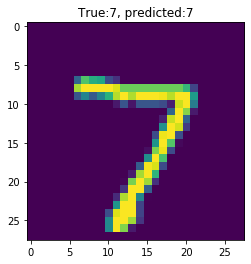

In [6]:
i0 = tf.reshape(img[0], [28,28])
plt.imshow(i0)
template = "True:{true}, predicted:{predict}"
_ = plt.title(template.format(true= str(label[0].numpy()),
                              predict=str(np.argmax(predictions[0]))))
plt.grid(False)

In [7]:
print(mnist_ds)

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float32, tf.uint8)>


In [8]:
def eval_model(interpreter, mnist_ds):
  total_seen = 0
  num_correct = 0

  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]
  for img, label in mnist_ds:
    total_seen += 1
    img = img[...,tf.newaxis]
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions = interpreter.get_tensor(output_index)
    if np.argmax(predictions) == label.numpy():
      num_correct += 1

    if total_seen % 500 == 0:
      print("Accuracy after %i images: %f" %
            (total_seen, float(num_correct) / float(total_seen)))

  return float(num_correct) / float(total_seen)

In [9]:
auc = eval_model(interpreter, mnist_ds)

Accuracy after 500 images: 0.996000
Accuracy after 1000 images: 0.993000
Accuracy after 1500 images: 0.991333
Accuracy after 2000 images: 0.991500
Accuracy after 2500 images: 0.990000
Accuracy after 3000 images: 0.990333
Accuracy after 3500 images: 0.990571
Accuracy after 4000 images: 0.990500
Accuracy after 4500 images: 0.991333
Accuracy after 5000 images: 0.991200
Accuracy after 5500 images: 0.992000
Accuracy after 6000 images: 0.992333
Accuracy after 6500 images: 0.992923
Accuracy after 7000 images: 0.992571
Accuracy after 7500 images: 0.993067
Accuracy after 8000 images: 0.993500
Accuracy after 8500 images: 0.993765
Accuracy after 9000 images: 0.993889
Accuracy after 9500 images: 0.994211
Accuracy after 10000 images: 0.994200
